In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [4]:
model_custom = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
])

model_custom.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [5]:
history_custom = model_custom.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=20,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1563/1563 [==============================] - 36s 18ms/step - loss: 1.7499 - accuracy: 0.0940 - val_loss: 1.4820 - val_accuracy: 0.0607
Epoch 2/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5119 - accuracy: 0.0882 - val_loss: 1.2437 - val_accuracy: 0.0750
Epoch 3/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4155 - accuracy: 0.0897 - val_loss: 1.2009 - val_accuracy: 0.0847
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3537 - accuracy: 0.0897 - val_loss: 1.1146 - val_accuracy: 0.0968
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3111 - accuracy: 0.0915 - val_loss: 1.0889 - val_accuracy: 0.1036
Epoch 6/20
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2876 - accuracy: 0.0920 - val_loss: 1.1192 - val_accuracy: 0.0791
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2551 - accuracy: 0.0915 - val_loss: 1.0547 -

In [6]:
# Fine-tuning a pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze convolutional layers

model_finetuned = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_finetuned.compile(optimizer=optimizers.Adam(lr=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Fine-tune the model with data augmentation
history_finetuned = model_finetuned.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=20,
    validation_data=(test_images, test_labels)
)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
1563/1563 [==============================] - 32s 19ms/step - loss: 1.6907 - accuracy: 0.0930 - val_loss: 1.3687 - val_accuracy: 0.0880
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5355 - accuracy: 0.0924 - val_loss: 1.3136 - val_accuracy: 0.0998
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4918 - accuracy: 0.0930 - val_loss: 1.2790 - val_accuracy: 0.1073
Epoch 4/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4723 - accuracy: 0.0929 - val_loss: 1.2746 - val_accuracy: 0.0995
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4597 - accuracy: 0.0935 - val_loss: 1.2490 - val_accuracy: 0.1106
Epoch 6/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4493 - accuracy: 0.0939 - val_loss: 1.2457 - val_accuracy: 0.0971
Epoch 7/20
1563/1563 [==============================] - 30s

313/313 [==============================] - 1s 2ms/step - loss: 0.9665 - accuracy: 0.0864
Test accuracy for custom CNN model: 0.08640000224113464
313/313 [==============================] - 2s 6ms/step - loss: 1.2185 - accuracy: 0.0879
Test accuracy for fine-tuned VGG16 model: 0.08789999783039093


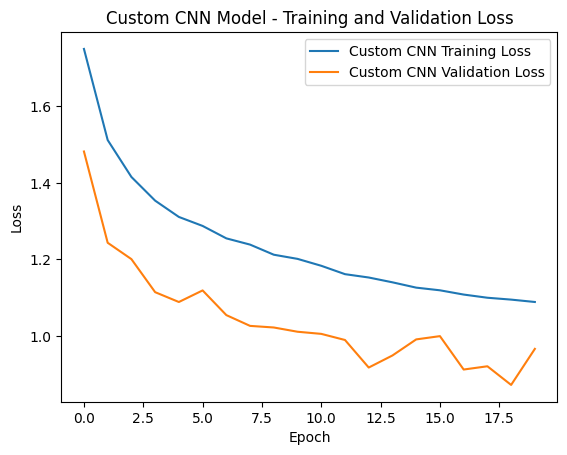

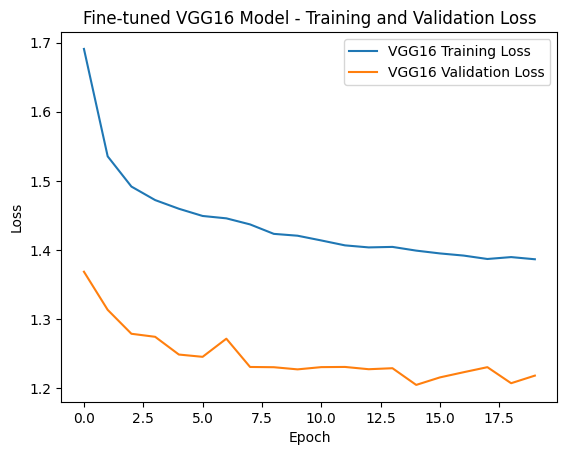

Test accuracy for custom CNN model: 0.08640000224113464
Test accuracy for fine-tuned VGG16 model: 0.08789999783039093


In [9]:
import matplotlib.pyplot as plt

# Evaluate the custom CNN model
test_loss_custom, test_acc_custom = model_custom.evaluate(test_images, test_labels)
print(f'Test accuracy for custom CNN model: {test_acc_custom}')

# Evaluate the fine-tuned VGG16 model
test_loss_finetuned, test_acc_finetuned = model_finetuned.evaluate(test_images, test_labels)
print(f'Test accuracy for fine-tuned VGG16 model: {test_acc_finetuned}')

plt.plot(history_custom.history['loss'], label='Custom CNN Training Loss')
plt.plot(history_custom.history['val_loss'], label='Custom CNN Validation Loss')
plt.title('Custom CNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_finetuned.history['loss'], label='VGG16 Training Loss')
plt.plot(history_finetuned.history['val_loss'], label='VGG16 Validation Loss')
plt.title('Fine-tuned VGG16 Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f'Test accuracy for custom CNN model: {test_acc_custom}')
print(f'Test accuracy for fine-tuned VGG16 model: {test_acc_finetuned}')